<a href="https://colab.research.google.com/github/SABRIS13/Machine_Learning/blob/main/Repaso_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning: Clasificación con SKLearn**

## Introducción a la clasificación

In [1]:
# Features 1=Si y 0=No
# ¿Tiene el pelo largo?
# ¿Tiene las uñas afiladas?
# ¿Hace miau?

perro1=[0,1,1]
perro2=[1,0,1]
perro3=[1,1,1]

gato1=[0,1,0]
gato2=[0,1,1]
gato3=[1,1,0]

datos=[perro1,perro2,perro3,gato1,gato2,gato3]
clases=[1,1,1,0,0,0]

In [2]:
from sklearn.svm import LinearSVC

model=LinearSVC()
model.fit(datos, clases)

LinearSVC()

In [3]:
animal_misterioso=[1,1,1]
model.predict([animal_misterioso])

array([1])

In [4]:
misterio1=[1,1,1]
misterio2=[1,1,0]
misterio3=[0,1,1]

pruebas=[misterio1,misterio2,misterio3]
clase_pruebas=[0,1,1]


In [6]:
previsiones=model.predict(pruebas)

In [13]:
correctos=(previsiones==clase_pruebas).sum()
tasa_acierto=correctos/len(pruebas)
print(f"La tasa de acierto fue de: {round(tasa_acierto,2)}%")

La tasa de acierto fue de: 0.33%


In [14]:
from sklearn.metrics import accuracy_score

tasa_acierto=accuracy_score(clase_pruebas,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto,2)}%")

La tasa de acierto fue de: 0.33%


In [15]:
from sklearn.svm import LinearSVC

x_train=[perro1,perro2,perro3,gato1,gato2,gato3]
y_train=[1,1,1,0,0,0]

model=LinearSVC()
model.fit(x_train,y_train)

LinearSVC()

In [19]:
misterio1=[1,1,1]
misterio2=[1,1,0]
misterio3=[0,1,1]

x_test=[misterio1,misterio2,misterio3]
y_test=[0,1,1]

In [21]:
previsiones=model.predict(x_test)


In [22]:
from sklearn.metrics import accuracy_score

tasa_acierto=accuracy_score(clase_pruebas,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")

La tasa de acierto fue de: 33.33%


## **Pruebas replicables, estratificación, lectura de datos de internet**

In [23]:
import pandas as pd
url="https://gist.githubusercontent.com/ahcamachod/38673f75b54ec62ffc290eff8e7c716e/raw/6eaa07e199d9f668bf94a034cb84dac58c82fa4f/tracking.csv"
data=pd.read_csv(url)
data.head()

,home,how_it_works,contact,bought
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [24]:
mapa={
    "home":"principal",
    "how_it_works":"como_funciona",
    "contact":"contacto",
    "bought":"compro"
}

data=data.rename(columns=mapa)
data.head()

,principal,como_funciona,contacto,compro
0,1,1,0,0
1,1,1,0,0
2,1,1,0,0
3,1,1,0,0
4,1,1,0,0


In [25]:
x=data[['principal', 'como_funciona','contacto']]
x.head()

,principal,como_funciona,contacto
0,1,1,0
1,1,1,0
2,1,1,0
3,1,1,0
4,1,1,0


In [27]:
y=data['compro']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: compro, dtype: int64

In [29]:
data.shape

(99, 4)

In [46]:
x_train=x[:75]
y_train=y[:75]
x_test=x[75:]
y_test=y[75:]

In [47]:
y_train.value_counts()

0    48
1    27
Name: compro, dtype: int64

In [56]:
27/75

0.36

In [48]:
y_test.value_counts()

0    18
1     6
Name: compro, dtype: int64

In [57]:
6/24

0.25

Los valores de train y test no se evaluan en la misma proporción.

In [31]:
print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')

Entrenaremos con 75 elementos y probaremos con 24 elementos.


In [33]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)

tasa_acierto=accuracy_score(y_test,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")


La tasa de acierto fue de: 95.83%


In [42]:
from sklearn.model_selection import train_test_split

SEED=42

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=SEED)


model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)

tasa_acierto=accuracy_score(y_test,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")

La tasa de acierto fue de: 96.0%


In [49]:
from sklearn.model_selection import train_test_split

SEED=42

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=SEED,stratify=y)


model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)

tasa_acierto=accuracy_score(y_test,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")

La tasa de acierto fue de: 96.0%


Con el parametro stratify hay una proporción smeejante de las clases para que no haya ningún problema. Como se ve a continuación:


In [50]:
y_train.value_counts()

0    49
1    25
Name: compro, dtype: int64

In [52]:
25/74

0.33783783783783783

In [51]:
y_test.value_counts()

0    17
1     8
Name: compro, dtype: int64

In [53]:
8/25

0.32

## **Proyecto de baja dimensionalidad y Baseline**

In [59]:
url='https://gist.githubusercontent.com/ahcamachod/7c55640f0d65bcbd31bb986bb599180c/raw/1b616e97a8719b3ff245fcdd68eaebdb8da38082/projects.csv'
datos=pd.read_csv(url) #Dataset que indica si un proyecto es finalizado o no es base a la horas 
                        #Esperadas de trabajo y el precio de este.
datos.head()

,unfinished,expected_hours,price
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [61]:
mapa={
    'unfinished':'no_finalizado',
    'expected_hours':'horas_esperadas',	
    'price':'precio'
}

datos=datos.rename(columns=mapa)
datos.head()

,no_finalizado,horas_esperadas,precio
0,1,26,192
1,1,88,9015
2,1,89,2577
3,1,42,275
4,1,39,170


In [62]:
cambio={1:0,0:1}
datos['finalizado']=datos.no_finalizado.map(cambio)

In [63]:
datos.head()

,no_finalizado,horas_esperadas,precio,finalizado
0,1,26,192,0
1,1,88,9015,0
2,1,89,2577,0
3,1,42,275,0
4,1,39,170,0


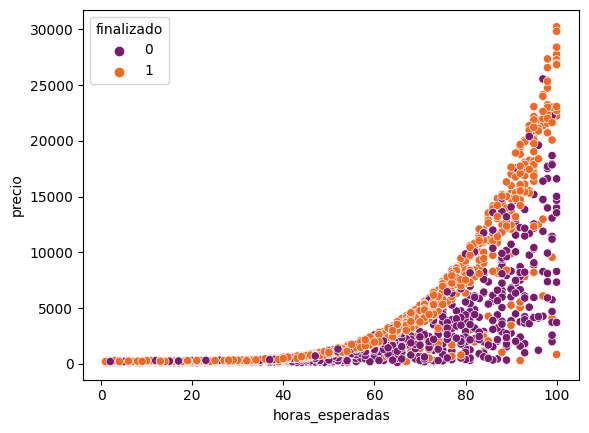

In [66]:
import seaborn as sns

sns.scatterplot(data=datos, x='horas_esperadas', y='precio', hue='finalizado',palette='inferno' );

De lo anterior, podemos ver que existe una tendencia que se finaliza el trabajo conforme se aumentan las horas de trabajo y el precio. Y en la medida que hay más horas pero el pago es menor, entonces no se finaliza.

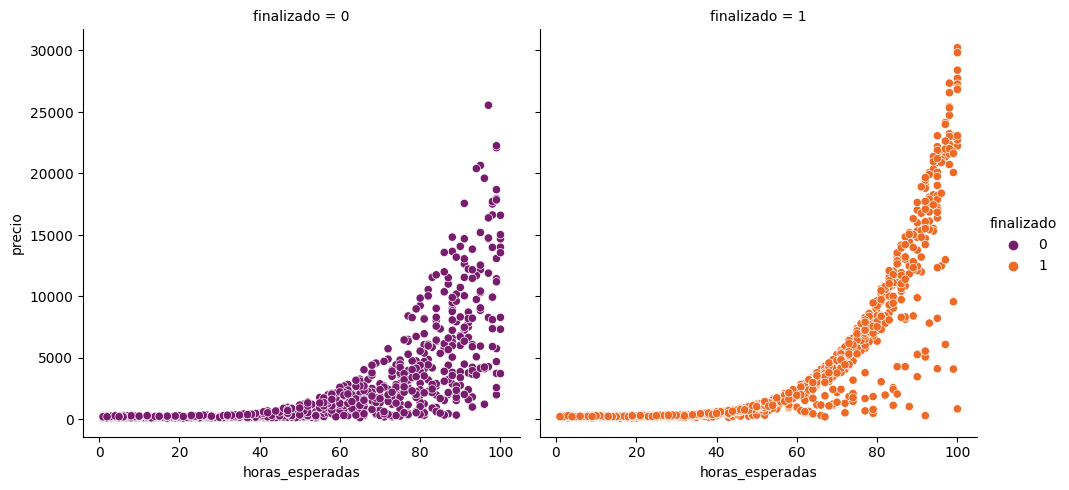

In [68]:
sns.relplot(data=datos, x='horas_esperadas', y='precio', hue='finalizado',palette='inferno',col='finalizado' );

In [70]:
import numpy as np

x=datos[['horas_esperadas',	'precio']]
y=datos.finalizado

SEED=42
np.random.seed(SEED)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')

model=LinearSVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)

tasa_acierto=accuracy_score(y_test,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")

Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 57.59%


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [71]:
base_previsiones=np.ones(540)
tasa_acierto=accuracy_score(y_test,base_previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")

La tasa de acierto fue de: 52.59%


¿Cómo clasifica el modelo?

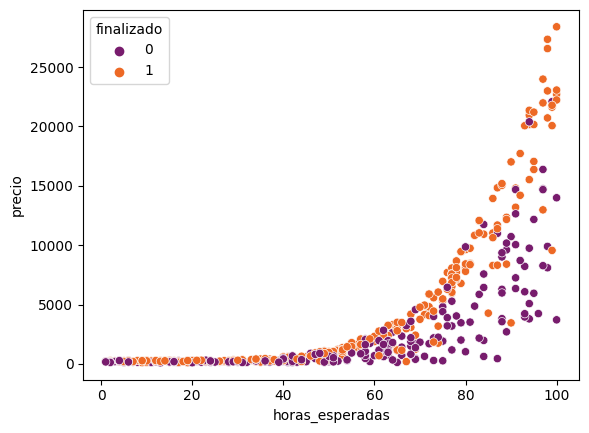

In [74]:
sns.scatterplot(data=x_test,x='horas_esperadas', y='precio',hue=y_test, palette='inferno');

In [78]:
x_min=x_test.horas_esperadas.min()
x_max=x_test.horas_esperadas.max()
y_min=x_test.precio.min()
y_max=x_test.precio.max()

In [79]:
pixeles=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixeles)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixeles)

In [80]:
xx,yy =np.meshgrid(eje_x,eje_y)
puntos=np.c_[xx.ravel(),yy.ravel()]
puntos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.811502e+04],
       [9.802000e+01, 2.811502e+04],
       [9.901000e+01, 2.811502e+04]])

In [81]:
Z=model.predict(puntos)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


In [84]:
Z=Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

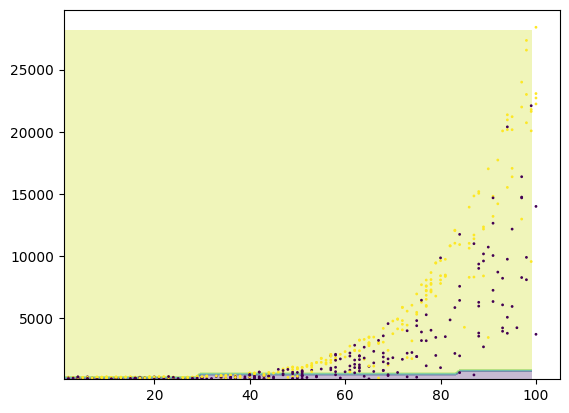

In [88]:
import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(x_test.horas_esperadas,x_test.precio,c=y_test,s=1);

## **Support Vector Machines y sistemas no lineales**





Entrenaremos con 1617 elementos y probaremos con 540 elementos.
La tasa de acierto fue de: 67.78%


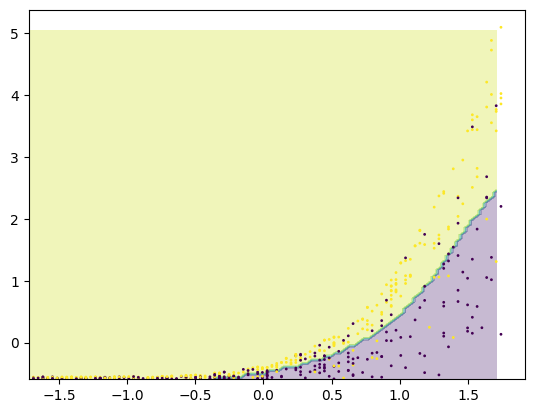

In [98]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x=datos[['horas_esperadas',	'precio']]
y=datos.finalizado

SEED=42
np.random.seed(SEED)

raw_x_train,raw_x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.')

scaler=StandardScaler()
scaler.fit(raw_x_train)
x_train=scaler.transform(raw_x_train)
x_test=scaler.transform(raw_x_test)


model=SVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)

data_x=x_test[:,0]
data_y=x_test[:,1]

x_min=data_x.min()
x_max=data_x.max()
y_min=data_y.min()
y_max=data_y.max()

pixeles=100
eje_x=np.arange(x_min,x_max,(x_max-x_min)/pixeles)
eje_y=np.arange(y_min,y_max,(y_max-y_min)/pixeles)


xx,yy =np.meshgrid(eje_x,eje_y)
puntos=np.c_[xx.ravel(),yy.ravel()]
Z=model.predict(puntos)
Z=Z.reshape(xx.shape)

import matplotlib.pyplot as plt

plt.contourf(xx,yy,Z, alpha=0.3)
plt.scatter(data_x,data_y,c=y_test,s=1);

tasa_acierto=accuracy_score(y_test,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")


## **Dummy Classifiers y árboles de decisión**

In [109]:
data=pd.read_csv('https://gist.githubusercontent.com/ahcamachod/1595316a6b37bf39baac355b081d9c3b/raw/98bc94de744764cef0e67922ddfac2a226ad6a6f/car_prices.csv')
data.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [110]:
mapa={
    'mileage_per_year':'millas_por_año'	,
    'model_year':'año_modelo',
    'price':'precio',
    'sold':'vendido'
}
data=data.rename(columns=mapa)
data.head()

,Unnamed: 0,millas_por_año,año_modelo,precio,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [111]:
cambio={'no':0,'yes':1}
data.vendido=data.vendido.map(cambio)
data.head()

,Unnamed: 0,millas_por_año,año_modelo,precio,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [112]:
from datetime import datetime

año_actual=datetime.today().year
data['edad_modelo']=año_actual-data.año_modelo
data.head()

,Unnamed: 0,millas_por_año,año_modelo,precio,vendido,edad_modelo
0,0,21801,2000,30941.02,1,23
1,1,7843,1998,40557.96,1,25
2,2,7109,2006,89627.50,0,17
3,3,26823,2015,95276.14,0,8
4,4,7935,2014,117384.68,1,9


In [113]:
data['km_por_año']=data.millas_por_año*1.60934
data.head()

,Unnamed: 0,millas_por_año,año_modelo,precio,vendido,edad_modelo,km_por_año
0,0,21801,2000,30941.02,1,23,35085.22134
1,1,7843,1998,40557.96,1,25,12622.05362
2,2,7109,2006,89627.50,0,17,11440.79806
3,3,26823,2015,95276.14,0,8,43167.32682
4,4,7935,2014,117384.68,1,9,12770.11290


In [114]:
data=data.drop(columns=['Unnamed: 0',	'millas_por_año',	'año_modelo'], axis=1)
data.head()

,precio,vendido,edad_modelo,km_por_año
0,30941.02,1,23,35085.22134
1,40557.96,1,25,12622.05362
2,89627.50,0,17,11440.79806
3,95276.14,0,8,43167.32682
4,117384.68,1,9,12770.11290


In [125]:
import numpy as np
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

x=data[['precio',	'edad_modelo',	'km_por_año']]
y=data.vendido

SEED=42
np.random.seed(SEED)

raw_x_train,raw_x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,stratify=y)
print(f'Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.')

scaler=StandardScaler()
scaler.fit(raw_x_train)
x_train=scaler.transform(raw_x_train)
x_test=scaler.transform(raw_x_test)


model=SVC()
model.fit(x_train,y_train)
previsiones=model.predict(x_test)

tasa_acierto=accuracy_score(y_test,previsiones)
print(f"La tasa de acierto fue de: {round(tasa_acierto*100,2)}%")


Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 76.04%


In [126]:
from sklearn.dummy import DummyClassifier

dummy=DummyClassifier(strategy='stratified')
dummy.fit(x_train,y_train)
exactitud=dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy stratified fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy stratified fue: 52.64%


In [127]:
from sklearn.dummy import DummyClassifier

dummy=DummyClassifier(strategy='most_frequent')
dummy.fit(x_train,y_train)
exactitud=dummy.score(x_test,y_test)*100
print(f'La exactitud del clasificador Dummy most_frequent fue: {round(exactitud,2)}%')

La exactitud del clasificador Dummy most_frequent fue: 58.0%


In [150]:
# Usando StandardScaler()

from sklearn.tree import DecisionTreeClassifier

x= data[['edad_modelo','km_por_año', 'precio']]
y= data.vendido

SEED = 42
np.random.seed(SEED)

raw_x_train, raw_x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(raw_x_train)} elementos y probaremos con {len(raw_x_test)} elementos.")

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')


Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


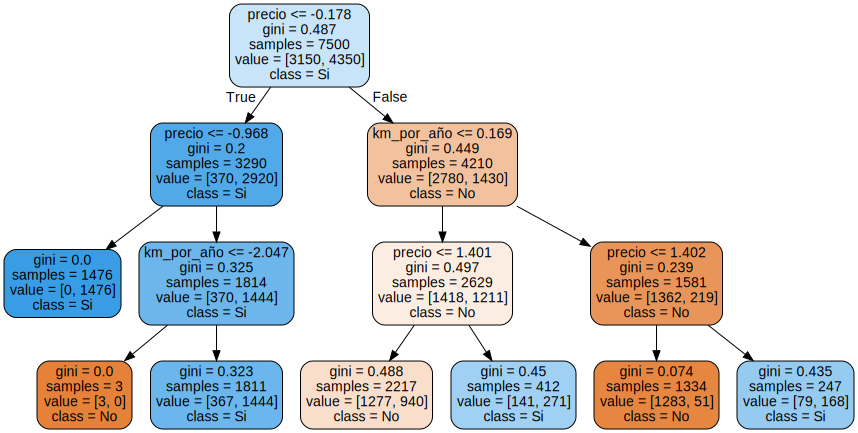

In [151]:
from sklearn.tree import export_graphviz
import graphviz
features=x.columns
dot_data=export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Si'])
grafico=graphviz.Source(dot_data)
grafico

In [154]:
# Sin estandarizar
from sklearn.tree import DecisionTreeClassifier

x= data[['edad_modelo','km_por_año', 'precio']]
y= data.vendido

SEED = 42
np.random.seed(SEED)

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,stratify=y)
print(f"Entrenaremos con {len(x_train)} elementos y probaremos con {len(x_test)} elementos.")

model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train,y_train)
previsiones= model.predict(x_test)

tasa_de_acierto = accuracy_score(y_test, previsiones)
print(f'La tasa de acierto fue de: {round(tasa_de_acierto*100,2)}%')

Entrenaremos con 7500 elementos y probaremos con 2500 elementos.
La tasa de acierto fue de: 78.04%


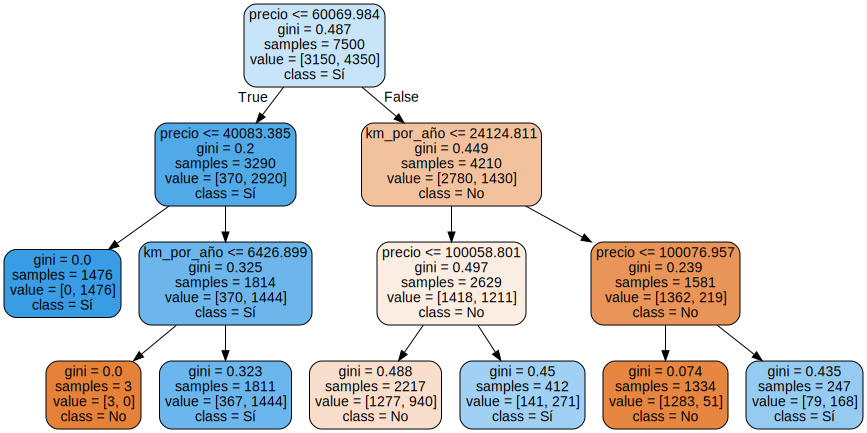

In [155]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns
dot_data = export_graphviz(model, feature_names=features, filled=True, rounded=True, class_names=['No','Sí'])
grafico = graphviz.Source(dot_data)
grafico